# Heart Disease Modeling

### Objective: Heart disease is one of the leading causes of death in America and being able to detect heart disease promptly can have a number of benefits. In this project, we will try to detect heart disease using supervised machine learning strategies. This model is not intended to replace doctors by any means, instead this model is intended to be a tool to assist physicians in their decision making.
Data Source: https://www.kaggle.com/fedesoriano/heart-failure-prediction
#### Kaggle Project overview:
 Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
 
 People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
logreg = LogisticRegression(solver='lbfgs')

In [3]:
heart_data=pd.read_csv("heart.csv.xls")

In [4]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
y=heart_data['HeartDisease']


In [7]:
y2=y

In [8]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [9]:
X=heart_data.drop('HeartDisease', axis='columns')

In [10]:
X2=X

In [11]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## One Hot Encoding to turn categorical data into variable data

In [13]:
column_trans = make_column_transformer((OneHotEncoder(), 
                                        ['Sex', 'ChestPainType', 
                                         'RestingECG',
                                         'ExerciseAngina', 
                                         'ST_Slope']),
                                         remainder='passthrough')

In [14]:
column_trans.fit_transform(X).shape

(918, 20)

## Modeling with Logistic Regression

In [15]:
pipe = make_pipeline(column_trans, logreg)

In [71]:
log_model=pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[ 64,  10],
       [  8, 102]])

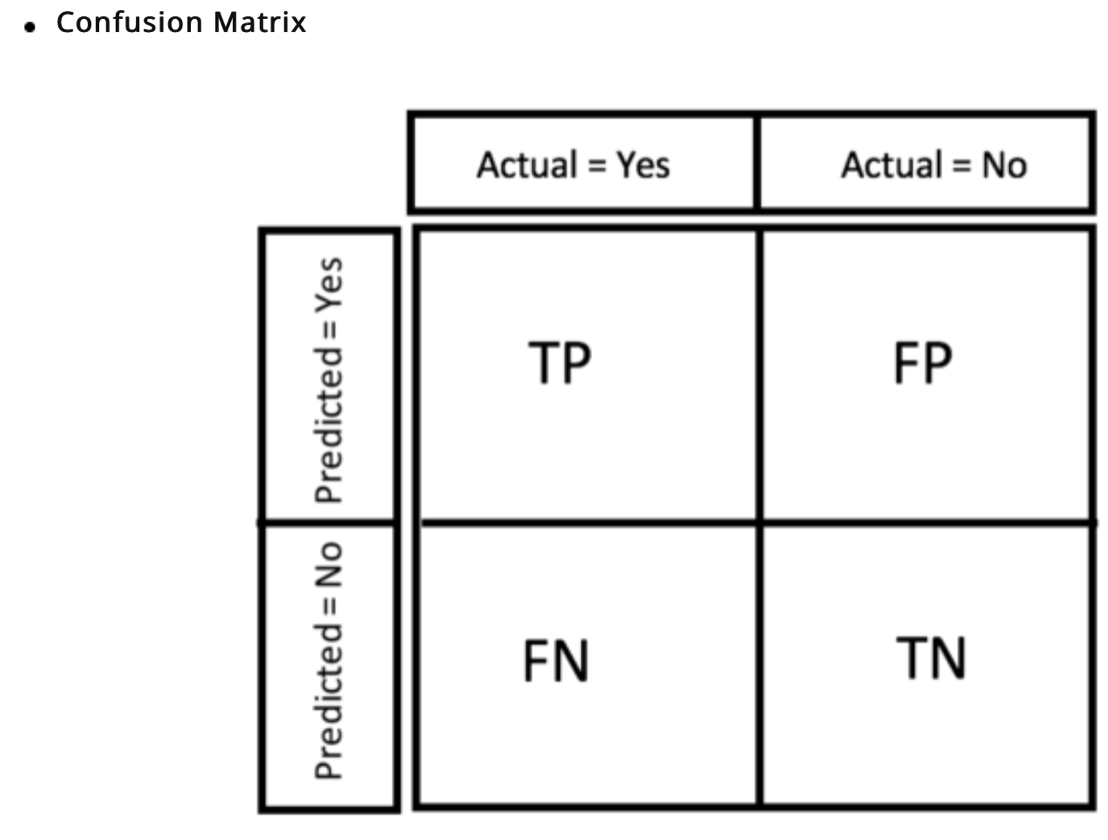

In [74]:
from sklearn.metrics import classification_report

In [75]:
classification_report(y_test, pipe.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        74\n           1       0.91      0.93      0.92       110\n\n    accuracy                           0.90       184\n   macro avg       0.90      0.90      0.90       184\nweighted avg       0.90      0.90      0.90       184\n'

In [76]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [77]:
accuracy_score(y_test, pipe.predict(X_test))

0.9021739130434783

In [78]:
y_pred=pipe.fit(X_train, y_train).predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:

print('In this model, overall we will predict heart disease with accuracy of: '
      + str(accuracy_score(y_test,y_pred)))


In this model, overall we will predict heart disease with accuracy of: 0.9021739130434783


In [52]:
print('The Precision Score- we will diagnose yes heart disease correctly at this percent: ' + str(precision_score(y_test,y_pred)))


The Precision Score- we will diagnose yes heart disease correctly at this percent: 0.9107142857142857


In [53]:
print('The Recall Score - We will catch this percent of patients who actually do have heart disease : ' + str(recall_score(y_test,y_pred)))

The Recall Score - We will catch this percent of patients who actually do have heart disease : 0.9272727272727272


## Modeling with Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [55]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [56]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [58]:
RF_model = make_pipeline(column_trans, RandomForestClassifier(n_estimators=100, oob_score=True, random_state=4))

In [59]:
#model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
RF_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(oob_score=True, random_state=4))])

In [60]:
accuracy_score(y_test, RF_model.predict(X_test))

0.8967391304347826

In [61]:
y_pred = RF_model.fit(X_train, y_train).predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [63]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))

Accuracy Score : 0.8967391304347826
Precision Score : 0.9099099099099099
Recall Score : 0.9181818181818182


In [64]:
print('In this model, overall we will predict heart disease with accuracy of: '
      + str(accuracy_score(y_test,y_pred)))

In this model, overall we will predict heart disease with accuracy of: 0.8967391304347826


In [65]:
print('The Precision Score- we will diagnose yes heart disease correctly at this percent: ' + str(precision_score(y_test,y_pred)))

The Precision Score- we will diagnose yes heart disease correctly at this percent: 0.9099099099099099


In [66]:
print('The Recall Score - We will catch this percent of patients who actually do have heart disease : ' + str(recall_score(y_test,y_pred)))

The Recall Score - We will catch this percent of patients who actually do have heart disease : 0.9181818181818182


In [67]:
from sklearn.inspection import plot_partial_dependence

Our Logistic regression model is titled pipe and our random forest model is titled RF_model

## Feature Importances of Model

In [89]:
importances = RF_model.feature_importances_

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [83]:
!pip install eli5

     |████████████████████████████████| 106 kB 2.0 MB/s eta 0:00:01
